# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [59]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight

In [2]:
# making a copy of the data to avoid changing the original

data = pd.read_csv("EasyVisa.csv")

df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [3]:
# getting the shape of the data

df.shape

(25480, 12)

* There are 25,480 observations and 12 columns in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations**
* 9 features are object types.
* 2 features are int type.
* 1 feature is float type.
* There are no missing values in the data.

In [5]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Observations**
* The maximum wage is 319210 while the minimum is 2.136.
* 75% of the establishments where created on or before the year 2005.

In [6]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
# getting a brief look at the bottom of the data

df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [8]:
df[df.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no missing values in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [9]:
# function to plot histogram and boxplot

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

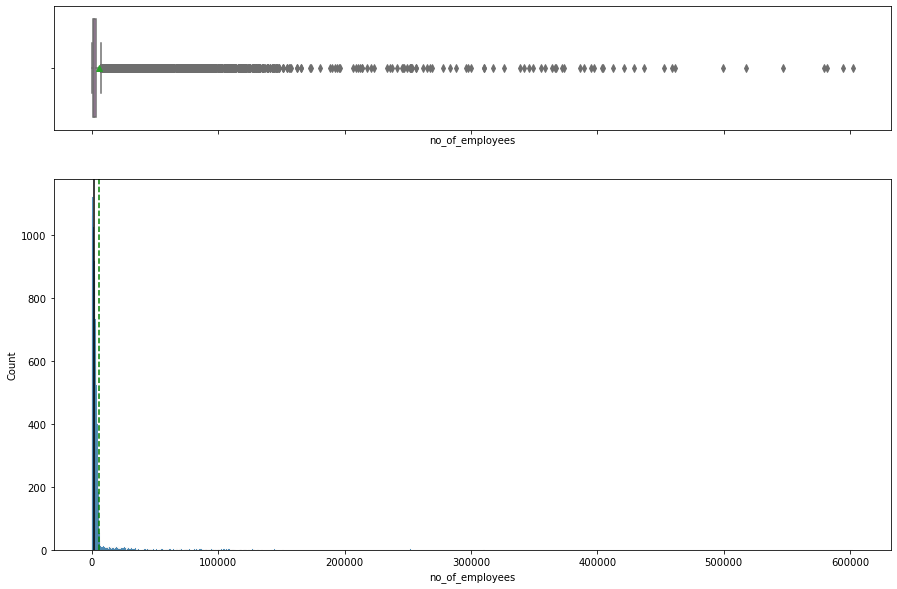

In [11]:
histogram_boxplot(df, "no_of_employees")

* Most establishments have an incredibly low number of employees.

In [12]:
df['no_of_employees'].value_counts()

183      18
854      16
724      16
1476     15
766      15
         ..
95881     1
5749      1
4026      1
5715      1
5718      1
Name: no_of_employees, Length: 7105, dtype: int64

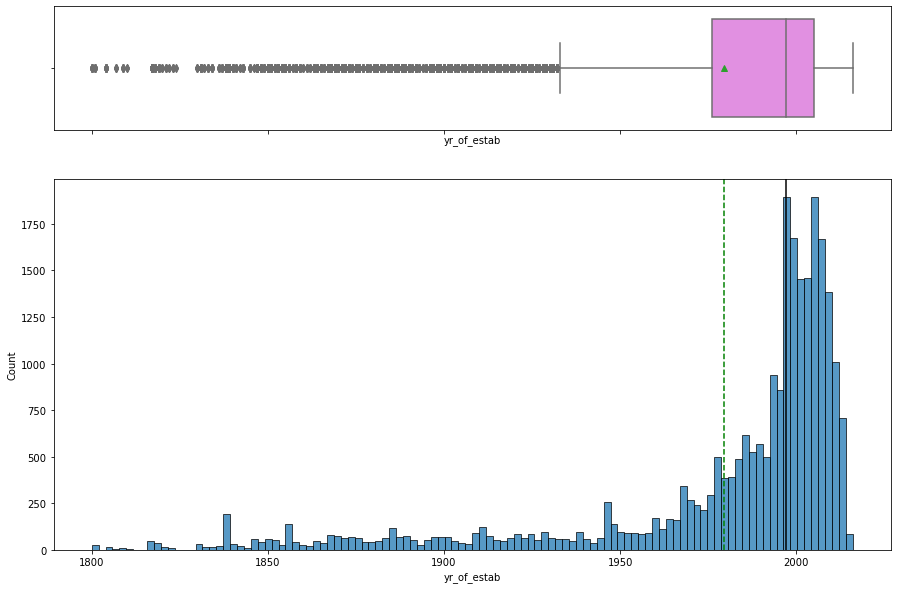

In [13]:
histogram_boxplot(df, "yr_of_estab")

* The distribution for year of establishment is left leaning with two peaks.
* Most establishments were founded between ~1995 and ~2015.

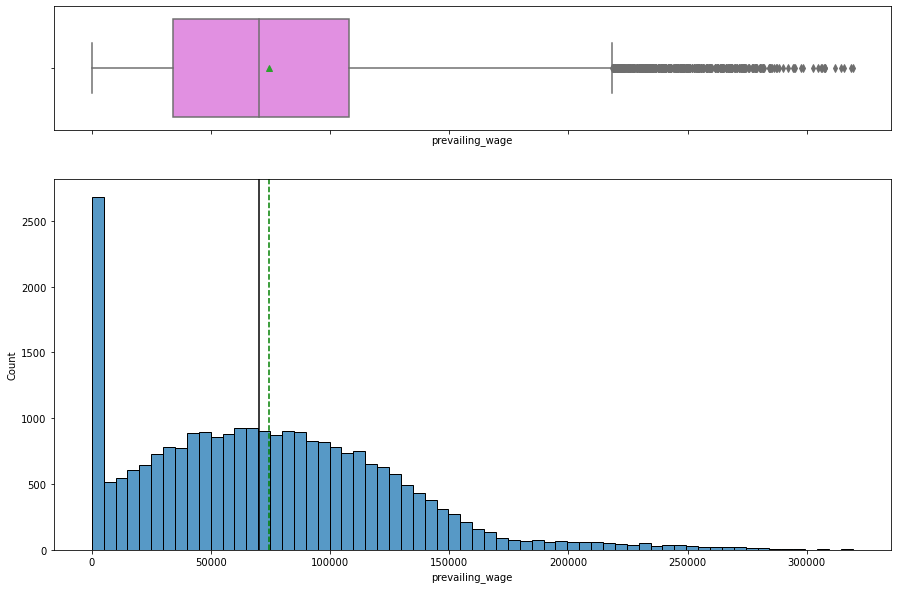

In [14]:
histogram_boxplot(df, "prevailing_wage")

* The wage distribution seems to follow a bell curve with an exception to most people earning close or around zero.
* This peculiarity is most likely due to the wages being recorded in 3 seperate formats.
* The distribution most likely only represents the wages stored in an anuual format.

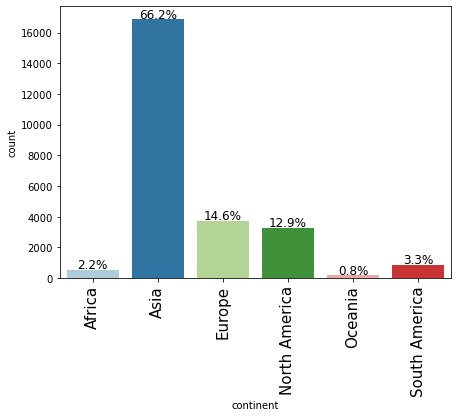

In [15]:
labeled_barplot(df, "continent", perc=True)

* 66.2% of the workers in the dataset are from the Asian continent, 14.6% are from Europe.
* 12.9% are from North America, 2.2% are from Africa, 0.8% are from Oceania and 3.3% are from South America.

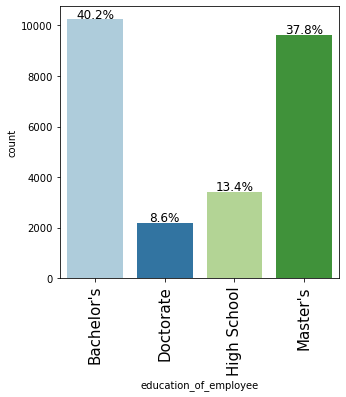

In [16]:
labeled_barplot(df, "education_of_employee", perc=True)

* 40.2% of the workers have Bachelor's Degrees, followed by 37.8% with Masters.
* 13.4% have a High School Diploma and 8.6% have a Doctorate.

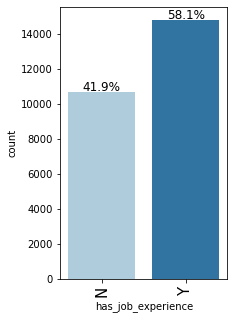

In [17]:
labeled_barplot(df, "has_job_experience", perc=True)

* 58.1% of people in the dataset have job experience while 41.9% do not have any experience.

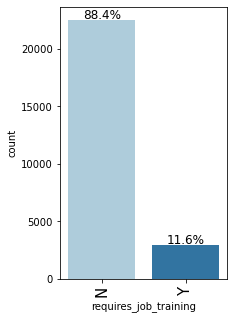

In [18]:
labeled_barplot(df, "requires_job_training", perc=True)

* 88.4% of people in the dataset do not require job training while 11.6% of people require it.

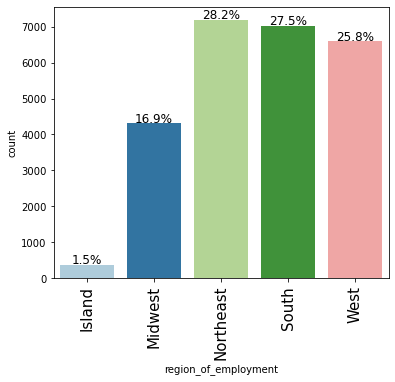

In [19]:
labeled_barplot(df, "region_of_employment", perc=True)

* The region of employment is distributed equally between the Northeast, the South and the West with 28.2%, 27.5% and 25.8% respectively.
* The Midwest employs 16.9% with the remaining 1.5% going to the Island.

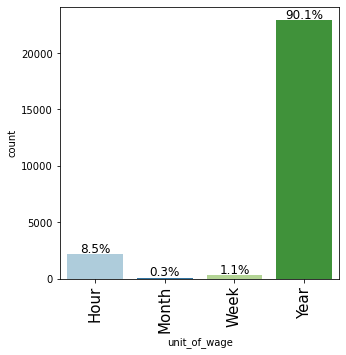

In [20]:
labeled_barplot(df, "unit_of_wage", perc=True)

* 90.1% of the enteries in the dataset have theri unit of wage in 'Year'.
* Hour, Month and Week account for 8.5%, 0.3% and 1.1% respectively.

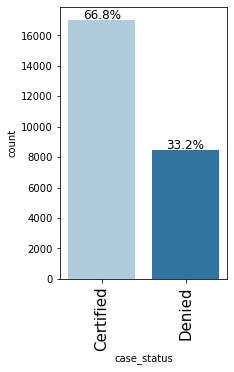

In [21]:
labeled_barplot(df, "case_status", perc=True)

* 66.8% of the individuals were certified while 33.2% were denied.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [22]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
df_byeducation = df.groupby(['education_of_employee'])['case_status']

In [24]:
df_byeducation.value_counts()

education_of_employee  case_status
Bachelor's             Certified      6367
                       Denied         3867
Doctorate              Certified      1912
                       Denied          280
High School            Denied         2256
                       Certified      1164
Master's               Certified      7575
                       Denied         2059
Name: case_status, dtype: int64

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


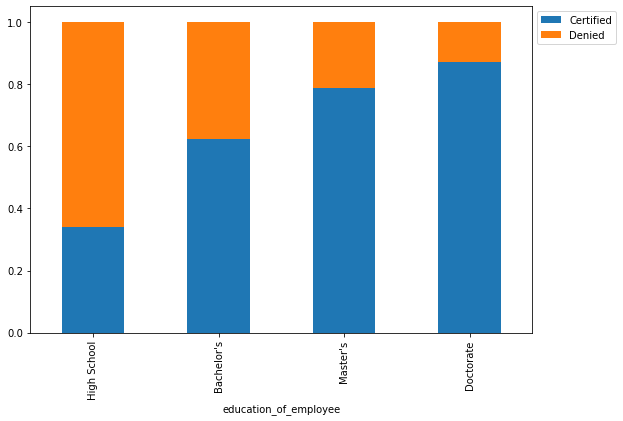

In [25]:
stacked_barplot(df, "education_of_employee", "case_status")

* More than 80% of people with doctorate degrees were certified.
* ~78% of people with Masters degrees were certified.
* ~62% of people with Bachelor's were certified.
* ~ less than 40% of people with High School degrees are certified.

In [26]:
#creating a crosstab table

data_crosstab = pd.crosstab(df['case_status'],
                            df['education_of_employee'])
print(data_crosstab)

education_of_employee  Bachelor's  Doctorate  High School  Master's
case_status                                                        
Certified                    6367       1912         1164      7575
Denied                       3867        280         2256      2059


In [27]:
#importing libraries for statistical analysis

import math
from scipy import stats
import pandas as pd
from scipy.stats import chi2_contingency

In [28]:
#finding the p-value

df_chi = pd.DataFrame({"Bachelor's": [6367, 3867], 'Doctorate': [1912, 280], 'Highschool':[1164,2256], 'Masters':[7575,2059]}, index = ['Certified', 'Denied'])
chi2, pval, dof, exp_freq = chi2_contingency(df_chi)
print('The p-value is ',pval)

The p-value is  0.0


* A p-value of 0 shows that we reject the null hypothesis and that education is statistically significant with respect to case status.

In [29]:
df_bycontinent = df.groupby(['continent'])['case_status']

In [30]:
df_bycontinent.value_counts()

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
Name: case_status, dtype: int64

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


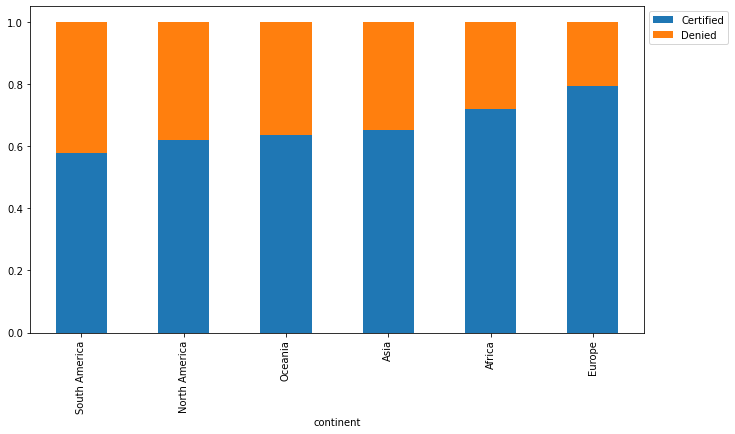

In [31]:
stacked_barplot(df, "continent", "case_status")

* Visa status success seems to consistent across the continents except Europe.
* Just under 80% of the applicants from Europe get certified.

In [32]:
#creating a crosstab table

data_crosstab = pd.crosstab(df['case_status'],
                            df['continent'])
print(data_crosstab)

continent    Africa   Asia  Europe  North America  Oceania  South America
case_status                                                              
Certified       397  11012    2957           2037      122            493
Denied          154   5849     775           1255       70            359


In [33]:
#finding the p-value

df_chi = pd.DataFrame({"Africa": [397, 154], 'Asia': [11012, 5849], 'Europe':[2957,775], 'North America':[2037,1255], 'Oceania':[122,70], 'South America':[493,359]}, index = ['Certified', 'Denied'])
chi2, pval, dof, exp_freq = chi2_contingency(df_chi)
print('The p-value is ',pval)

The p-value is  8.828798103147954e-74


* Since the p-value is lower than 0.05 we reject the null hypothesis. Hence we can conclude that the visa success depends on continent.

In [34]:
df_byworkexp = df.groupby(['has_job_experience'])['case_status']

In [35]:
df_byworkexp.value_counts()

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
Name: case_status, dtype: int64

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


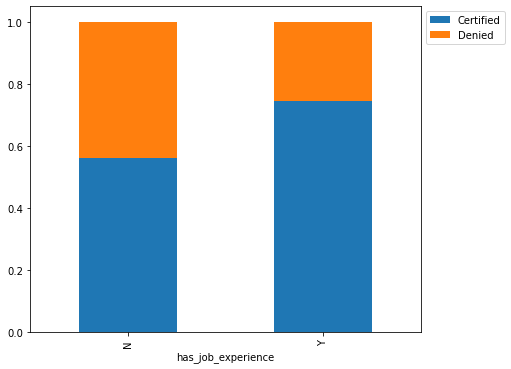

In [36]:
stacked_barplot(df, "has_job_experience", "case_status")

* Close to 80% of applicants with job experience where successful with their appliaction.
* Less than 60% of applicants without job experience were certified.

In [37]:
#creating a crosstab table

data_crosstab = pd.crosstab(df['case_status'],
                            df['has_job_experience'])
print(data_crosstab)

has_job_experience     N      Y
case_status                    
Certified           5994  11024
Denied              4684   3778


In [38]:
#finding the p-value

df_chi = pd.DataFrame({"N": [5994, 4684], 'Y': [11024, 3778]}, index = ['Certified', 'Denied'])
chi2, pval, dof, exp_freq = chi2_contingency(df_chi)
print('The p-value is ',pval)

The p-value is  1.9225604643164335e-206


* Since the p-value is lower than 0.05 we reject the null hypothesis. Hence we can conclude that the visa success depends on job experience.

In [39]:
df_bypayunit = df.groupby(['unit_of_wage'])['case_status']

In [40]:
df_bypayunit.value_counts()

unit_of_wage  case_status
Hour          Denied          1410
              Certified        747
Month         Certified         55
              Denied            34
Week          Certified        169
              Denied           103
Year          Certified      16047
              Denied          6915
Name: case_status, dtype: int64

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


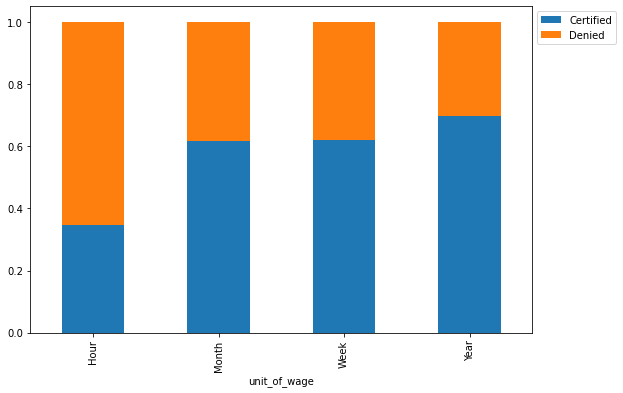

In [41]:
stacked_barplot(df, "unit_of_wage", "case_status")

* ~70% of people with a yearly unit of wage are certified.
* ~62% of people with a monthly or weekly unit of wage are certified.
* ~36% of people with an hourly unit of wage are certified.

In [42]:
#creating a crosstab table

data_crosstab = pd.crosstab(df['case_status'],
                            df['unit_of_wage'])
print(data_crosstab)

unit_of_wage  Hour  Month  Week   Year
case_status                           
Certified      747     55   169  16047
Denied        1410     34   103   6915


In [43]:
#finding the p-value

df_chi = pd.DataFrame({"Hour": [747, 1410], 'Month': [55, 34], 'Week':[169,103], 'Year':[16047,6915]}, index = ['Certified', 'Denied'])
chi2, pval, dof, exp_freq = chi2_contingency(df_chi)
print('The p-value is ',pval)

The p-value is  5.19338536941224e-240


* Since the p-value is lower than 0.05 we reject the null hypothesis. Hence we can conclude that the visa success depends on the unit of wage.

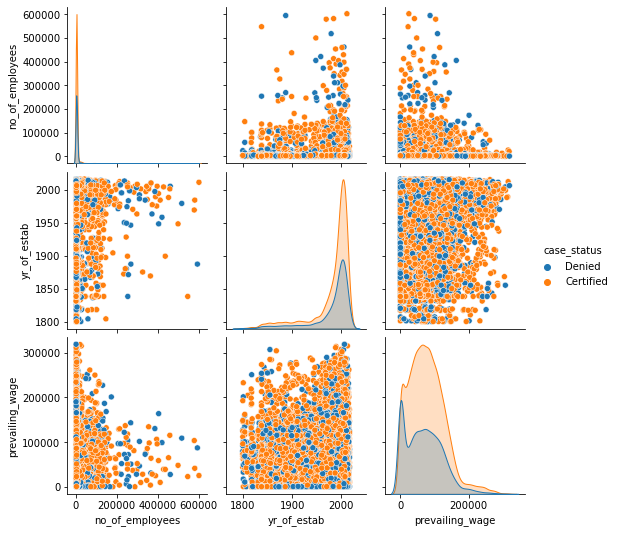

In [44]:
# plotting the pairplot

sns.pairplot(data=df, hue="case_status")
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [45]:
# making a copy of the data to be used in data preprocessing

df_p = df.copy()

In [46]:
# dropping columns 

df_p = df_p.drop(['case_id'],axis=1)

In [47]:
df_p['no_of_employees'] = df_p['no_of_employees'].apply(lambda x: abs(x))

In [48]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    df_p,
    columns=[
        "continent",
        "education_of_employee",
        "has_job_experience",
        "requires_job_training",
        "region_of_employment",
        "unit_of_wage",
        "full_time_position",
        "case_status"
    ],
    drop_first=True,
)
dummy_data.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y,case_status_Denied
0,14513,2007,592.2029,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,44444,2008,122996.8600,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [49]:
X = dummy_data.drop("case_status_Denied", axis=1)  # Features

In [50]:
y = dummy_data["case_status_Denied"].astype("int64")  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

In [51]:
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [52]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: case_status_Denied, dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [53]:
dummy_data.describe()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y,case_status_Denied
count,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,...,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592,0.661735,0.146468,0.129199,0.007535,0.033438,0.086028,0.134223,...,0.115973,0.169035,0.282378,0.275392,0.258477,0.003493,0.010675,0.901177,0.893760,0.332104
std,22877.917453,42.366929,52815.942327,0.473129,0.353582,0.335427,0.086480,0.179781,0.280411,0.340898,...,0.320199,0.374790,0.450165,0.446721,0.437806,0.058999,0.102769,0.298430,0.308151,0.470977
min,11.000000,1800.000000,2.136700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1022.000000,1976.000000,34015.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,2109.000000,1997.000000,70308.210000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,3504.000000,2005.000000,107735.512500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,602069.000000,2016.000000,319210.270000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


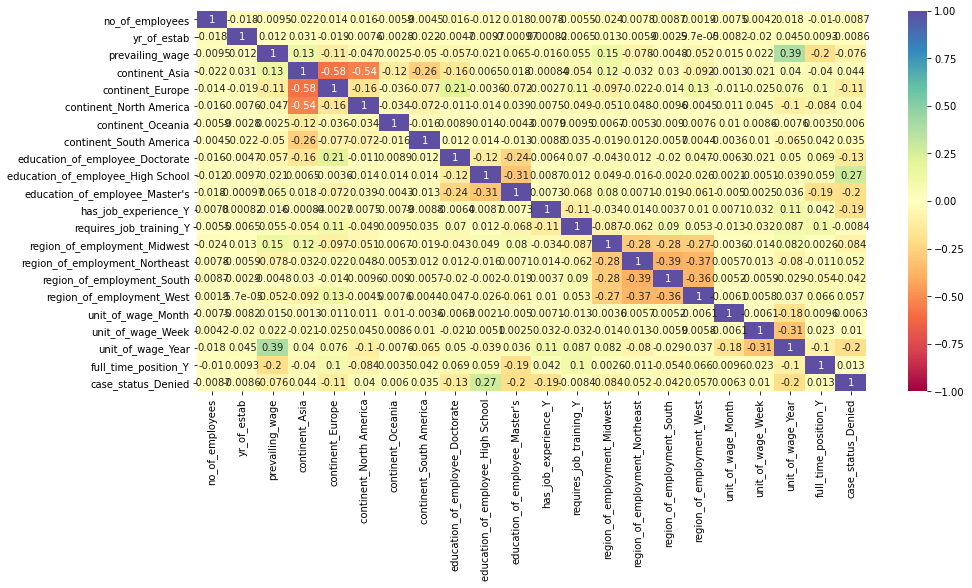

In [54]:
plt.figure(figsize=(15, 7))
sns.heatmap(dummy_data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

## Building bagging and boosting models

In [55]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [56]:
y.value_counts(1)

0    0.667896
1    0.332104
Name: case_status_Denied, dtype: float64

In [57]:
y_test.value_counts(1)

0    0.667844
1    0.332156
Name: case_status_Denied, dtype: float64

In [61]:
class_weights = compute_class_weight('balanced',np.unique(y),y)

print (class_weights)



[0.74861911 1.50555424]


In [62]:
# Convert class_weights to a dictionary to pass it to class_weight in model.fit

class_weights = dict(enumerate(class_weights))

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [64]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [65]:
# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.663134  0.495865   0.492952  0.494404


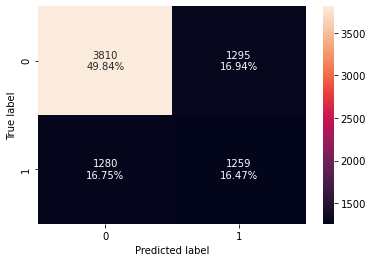

In [66]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

In [67]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.33,1:0.67},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.663134  0.495865   0.492952  0.494404


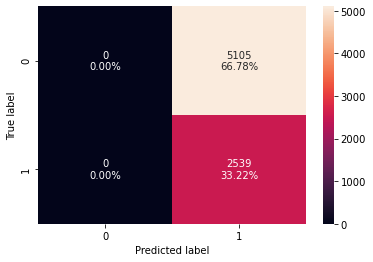

In [68]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.735217  0.501772    0.62666  0.557305


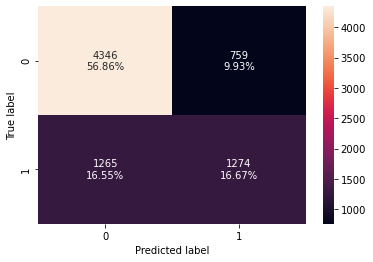

In [69]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [70]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.33,1:0.67},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=5,
                       max_features='sqrt', min_samples_leaf=6, n_estimators=10,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.710137  0.688334   0.550872  0.611978
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.713239  0.705002   0.553665  0.620236


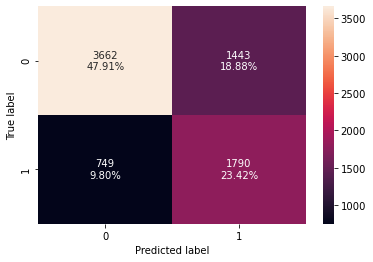

In [71]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

   Accuracy    Recall  Precision        F1
0  0.977013  0.940571   0.989696  0.964508
   Accuracy    Recall  Precision        F1
0  0.714024  0.444269   0.592748  0.507879


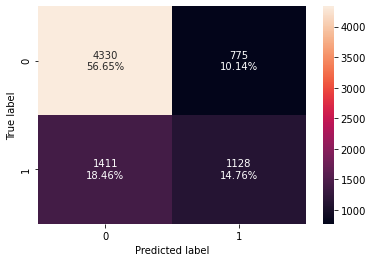

In [72]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

In [73]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

   Accuracy    Recall  Precision       F1
0  0.998767  0.996623   0.999661  0.99814
   Accuracy    Recall  Precision        F1
0  0.731162  0.456479   0.631952  0.530071


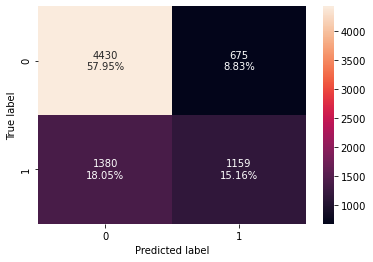

In [74]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

   Accuracy    Recall  Precision        F1
0  0.737497  0.433564   0.659307  0.523121
   Accuracy    Recall  Precision        F1
0  0.735479  0.426546   0.656762  0.517192


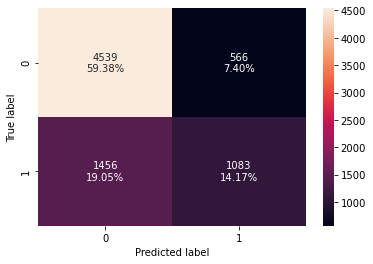

In [75]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [76]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1.9000000000000001, n_estimators=10,
                   random_state=1)

   Accuracy    Recall  Precision        F1
0  0.611404  0.725477   0.447511  0.553559
   Accuracy    Recall  Precision        F1
0  0.615646  0.719181   0.450753  0.554173


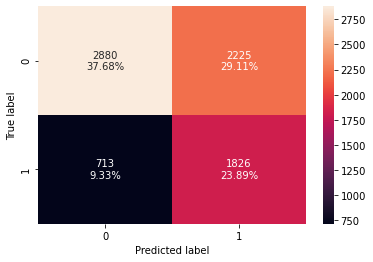

In [77]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756672  0.512747   0.676241  0.583253
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.752355  0.506892   0.667531  0.576226


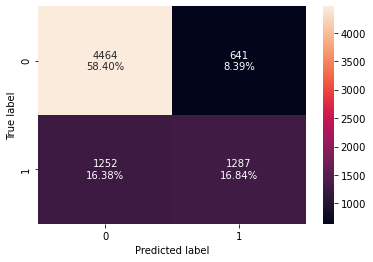

In [78]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [79]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=200, random_state=1,
                           subsample=0.8)

Training performance:
    Accuracy   Recall  Precision       F1
0  0.760428  0.52237   0.681798  0.59153
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.749477  0.501378   0.662331  0.570724


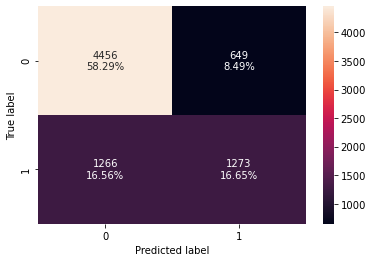

In [80]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.836342  0.646125   0.823011  0.723919
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.741627  0.491926   0.645812  0.558462


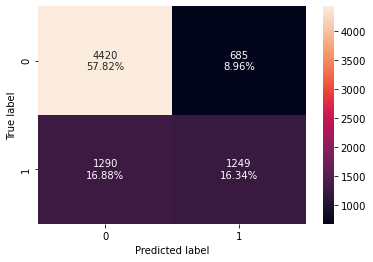

In [81]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [82]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.51211  0.965389   0.402251  0.567882
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.50798  0.958645   0.399672  0.564144


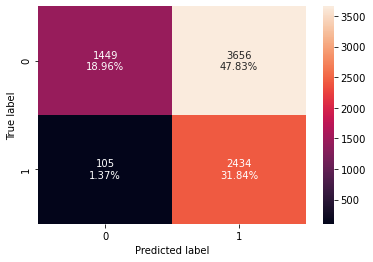

In [83]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [84]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

In [85]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.33,
                                                                     1: 0.67},
                                                       max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_leaf=6,
                                                       n_estimators=10,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=200,
                                                    

Training performance:
    Accuracy    Recall  Precision        F1
0  0.508971  0.966233   0.400742  0.566521
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.501832  0.959039   0.396644  0.561189


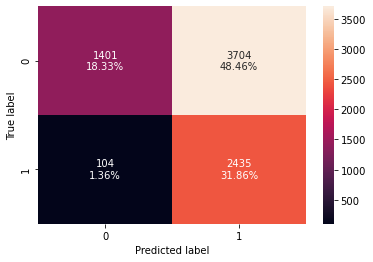

In [86]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,1.0,0.710137,0.977013,0.998767,0.737497,0.611404,0.756672,0.760428,0.836342,0.512110,0.508971
Recall,1.0,1.0,1.0,0.688334,0.940571,0.996623,0.433564,0.725477,0.512747,0.522370,0.646125,0.965389,0.966233
Precision,1.0,1.0,1.0,0.550872,0.989696,0.999661,0.659307,0.447511,0.676241,0.681798,0.823011,0.402251,0.400742
F1,1.0,1.0,1.0,0.611978,0.964508,0.998140,0.523121,0.553559,0.583253,0.591530,0.723919,0.567882,0.566521


In [88]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.663134,0.663134,0.735217,0.713239,0.714024,0.731162,0.735479,0.615646,0.752355,0.749477,0.741627,0.507980,0.501832
Recall,0.495865,0.495865,0.501772,0.705002,0.444269,0.456479,0.426546,0.719181,0.506892,0.501378,0.491926,0.958645,0.959039
Precision,0.492952,0.492952,0.626660,0.553665,0.592748,0.631952,0.656762,0.450753,0.667531,0.662331,0.645812,0.399672,0.396644
F1,0.494404,0.494404,0.557305,0.620236,0.507879,0.530071,0.517192,0.554173,0.576226,0.570724,0.558462,0.564144,0.561189


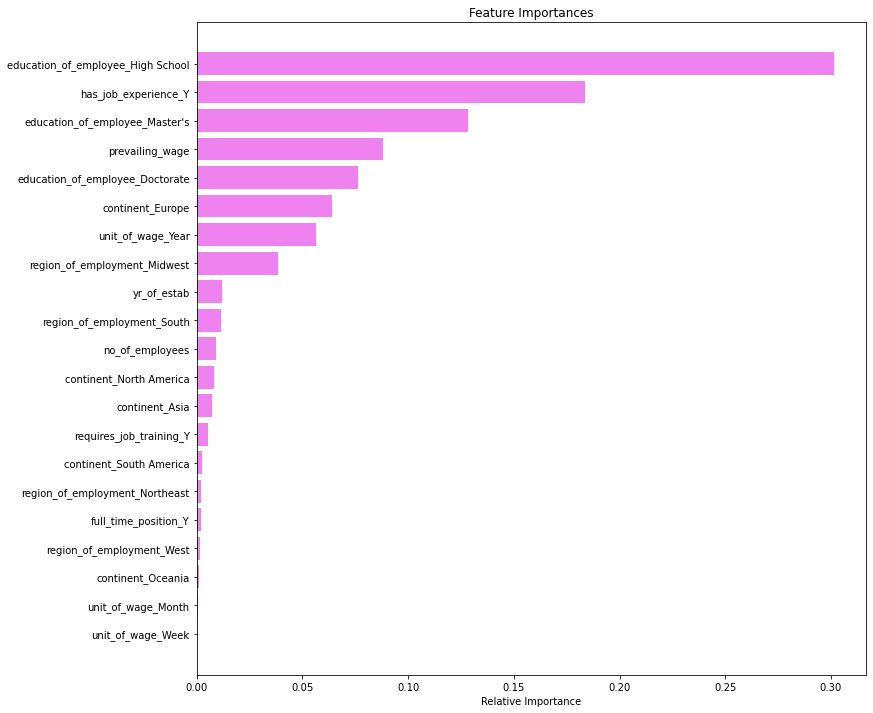

In [89]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##  Observations

- Yes. Tuning the hyperparameters did improve the model performance.

## Model Performance Comparison and Conclusions

- The majority of the models are overfitting the training data in terms of f1-score.
- The stacking classifier is giving the highest f1-score on the test data and is giving a generalized performance as compared to the bagging classifier so it is our current model pick.

## Actionable Insights and Recommendations

### Conclusion

- Based on our analysis, we can say that having a high school education is the most important feature to determining whether a candidates visa status is certified or not.

- Prevailing wage is also a very important feature along with job experience, higher levels of education and being from the European continent.

- More than 80% of people with doctorate degrees were certified, ~78% of people with Masters degrees were certified, ~62% of people with Bachelor's were certified while less than 40% of people with High School degrees are certified.

- Once the desired performance is achieved from the model, the alogorithm can be more accurate in selecting the right candidates for job opportunities.